In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [ ]:
df_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT7eWCvRGOwwJEqSgOLQMXu9Bnh-WkQWa4EYo0RVLwUH-AGOxBkrxaNCS4hjcWi9o1KurjIcAKvHi_s/pub?gid=436772541&single=true&output=csv"
income_dataset = pd.read_csv(df_path)

In [ ]:
income_dataset.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [ ]:
income_dataset.shape

(20, 3)

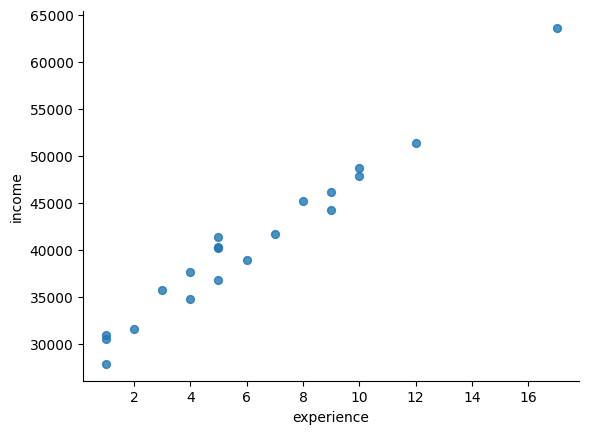

In [ ]:
# @title experience vs income

from matplotlib import pyplot as plt
income_dataset.plot(kind='scatter', x='experience', y='income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

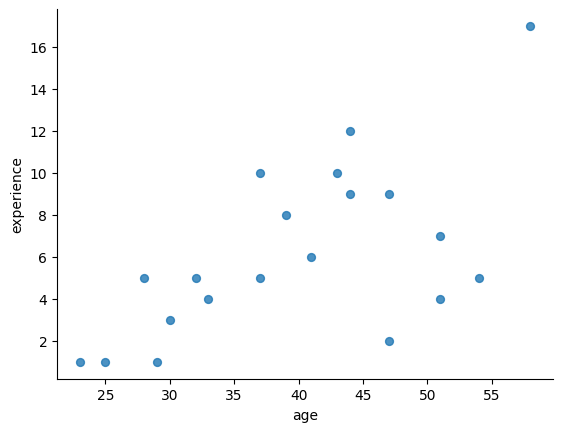

In [ ]:
# @title age vs experience

from matplotlib import pyplot as plt
income_dataset.plot(kind='scatter', x='age', y='experience', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X1, y1 = income_dataset.iloc[:, :-1].values, income_dataset.iloc[:, -1].values
# X1_scaled = scale(X1)
# print(X1_scaled)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)

In [ ]:
correlation_matrix = income_dataset.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,age,experience,income
age,1.000000,0.615165,0.532204
experience,0.615165,1.000000,0.984227
income,0.532204,0.984227,1.000000


In [ ]:
sk_linear_regression = LinearRegression()
sk_linear_regression.fit(X1_train, y1_train)

sk_lr_pred_res = sk_linear_regression.predict(X1_test)
sk_lr_r2 = r2_score(y1_test, sk_lr_pred_res)
sk_lr_mape = mean_absolute_percentage_error(y1_test, sk_lr_pred_res)

print(f'Scikit-learn Linear regression R2 score: {sk_lr_r2}')
print(f'Scikit-learn Linear regression MAPE: {sk_lr_mape}', '\n')

print(f'weights: {sk_linear_regression.intercept_, *sk_linear_regression.coef_}')
print(f'prediction: {sk_lr_pred_res}', '\n')

Scikit-learn Linear regression R2 score: 0.9307237996010832
Scikit-learn Linear regression MAPE: 0.046665771765258775 

weights: (31734.098811233787, -107.40804717984585, 2168.8736968153985)
prediction: [46528.00800666 35018.47848628 49448.73803373 38604.36954966
 30788.13913983] 



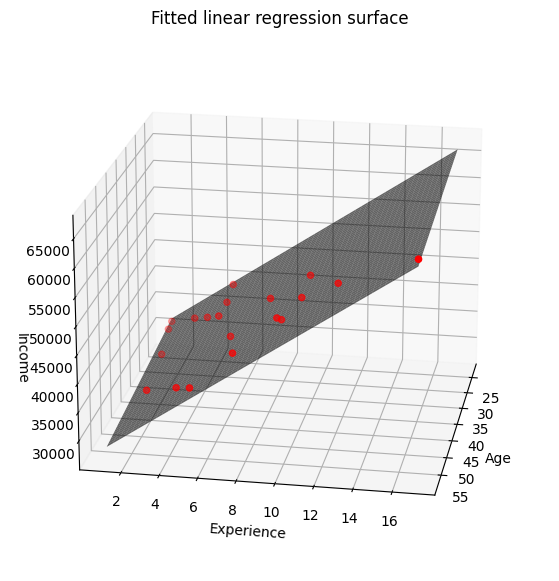

In [ ]:
feature1, feature2 = X1[:, 0], X1[:, 1]
X1_linspace = np.linspace(feature1.min(), feature1.max())
X2_linspace = np.linspace(feature2.min(), feature2.max())
X1_surface, X2_surface = np.meshgrid(X1_linspace, X2_linspace)
X_surfaces = np.array([X1_surface.ravel(), X2_surface.ravel()]).T

sk_linear_regression = LinearRegression()
sk_linear_regression.fit(X1_train, y1_train)
y_surface = sk_linear_regression.predict(X_surfaces).reshape(X1_surface.shape)

fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection='3d')
ax.scatter(feature1, feature2, y1, color='red', marker='o')
ax.plot_surface(X1_surface, X2_surface, y_surface, color='black', alpha=0.6)
plt.title('Fitted linear regression surface')
ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Income')
ax.view_init(20, 10)
plt.show()

In [ ]:
# insert data for test [Age Experience]
data_for_test = np.array([[47, 10]])
result = sk_linear_regression.predict(data_for_test)
print(result)


[48374.65756194]
